In [1]:
%pylab inline
import numpy as np
import matplotlib
from numpy import linalg as LA
import scipy.special as SP

Populating the interactive namespace from numpy and matplotlib


## Linear algebra manipulation functions:

In [2]:
def largest_eigenvalue_finder(matrix):
    'Receives a matrix argument and returns the largest eigenvalue'
    
    z, v = LA.eig(matrix)
    
    return max(z)

In [3]:
def minor(matrix,i,j):
    # ith row, jth column removed
    return matrix[np.array(list(range(i))+list(range(i+1,matrix.shape[0])))[:,np.newaxis],
               np.array(list(range(j))+list(range(j+1,matrix.shape[1])))]

In [4]:
def find_adj(matrix):
    'Receives a matrix input and outputs the transposed co matrix'
    
    C = np.zeros(matrix.shape)
    rows, cols = C.shape
    
    for i in range(0,rows):
        for j in range(0,cols):
            C[i,j] = (-1)**(i+j) * LA.det(minor(matrix,i,j))
        next
    next
    
    return C.transpose()

In [5]:
def lambda_prime_finder(matrix_minus_eigenvalues,matrix_prime):
    'Finds lambda prime for given matrices'
    
    return trace(matmul(find_adj(matrix_minus_eigenvalues),matrix_prime))/trace(find_adj((matrix_minus_eigenvalues)))

In [6]:
def find_adj_prime(matrix,matrix_prime):
    'Receives a matrix and its first derivative, and finds the derivative of the matrix adjugate'
    
    C = np.zeros(matrix.shape)
    rows, cols = C.shape
    
    for i in range(0,rows):
        for j in range(0,cols):
            C[i,j] = (-1)**(i+j) * trace(matmul(find_adj(minor(matrix,i,j)),minor(matrix_prime,i,j)))
        next
    next
    
    return C.transpose()

In [7]:
def lambda_second_prime_finder(matrix_minus_eigenvalues,matrix_prime_minus_eigenvalues_prime,matrix_double_prime):
    'Finds lambda second prime for given matrices'
    
    return (trace(matmul(find_adj(matrix_minus_eigenvalues),matrix_double_prime) + matmul(find_adj_prime(matrix_minus_eigenvalues,matrix_prime_minus_eigenvalues_prime),matrix_prime_minus_eigenvalues_prime)))/(trace(find_adj(matrix_minus_eigenvalues)))

## Coupling constant calulations:

In [8]:
def heaviside(value):
    'Replicating the heaviside function'
    
    if value > 0:
        return 1
    elif value == 0:
        return 0.5
    else:
        return 0

In [9]:
def elec_int_pot(z,p,p_0,phi,a,M,N):
    'Calculates the inter-ionic interaction potential between two charges in a cylindrical metallic pore'
    
    u = 0
    
    for m in range(0,M):
        
        k_nm = SP.jn_zeros(m,N)
        a_m = 2*heaviside(m)
        
        temp = 0
        
        for n in range(0,N):
            
            temp = temp + ((SP.jn(m,(k_nm[n]*p_0)/a)*SP.jn(m,(k_nm[n]*p)/a))/(k_nm[n]*((SP.jn(m+1,k_nm[n]))**2)))*exp(-1*(k_nm[n]*abs(z))/a)
            
        next
        
        u = u + (a_m*cos(m*phi)*temp)
        
        
    next
    
    return 28*(2/a)*u

## Now here is the code for a two row, two-state model:

In [10]:
def transfer_matrix_element_two_row_diag(u,a_1,a_2,a_3,a_4,p_i,q_i,p_ip1,q_ip1):
    'Finds the value of a given element of our diagonal, two row model'
    '4x4 transfer matrix for the given values of u, a_1, a_2, a_3, a_4 (alpha 1-4) and spins'
    
    return exp(-a_1*(p_i*p_ip1 + q_i*q_ip1) - a_2*(p_i*q_i) -  a_3*(p_i*q_ip1) - a_4*(q_i*p_ip1) - u*(p_i + q_i))

In [11]:
def two_row_diag(u,a_1,a_2,a_3,a_4):

    matrix_dimension = 4
    
    transfer_matrix = array([[0.0 for col in range(matrix_dimension)] for row in range(matrix_dimension)])
    transfer_matrix_prime = array([[0.0 for col in range(matrix_dimension)] for row in range(matrix_dimension)])
    transfer_matrix_double_prime = array([[0.0 for col in range(matrix_dimension)] for row in range(matrix_dimension)])
    
    free_energy_transfer_matrix_prime = array([[0.0 for col in range(matrix_dimension)] for row in range(matrix_dimension)])
    
    transfer_matrix_minus_l = array([[0.0 for col in range(matrix_dimension)] for row in range(matrix_dimension)])
    transfer_matrix_prime_minus_dl = array([[0.0 for col in range(matrix_dimension)] for row in range(matrix_dimension)])
    
    rows, cols = transfer_matrix.shape
    
    spins_array = array([[-1,-1],
                         [-1,1],
                         [1,-1],
                         [1,1]])
    
    for i in range(0,rows):
        for j in range(0,cols):
            transfer_matrix[i,j] = transfer_matrix_element_two_row_diag(u,a_1,a_2,a_3,a_4,spins_array[i,0],spins_array[i,1],spins_array[j,0],spins_array[j,1])
            
            transfer_matrix_prime[i,j] = (-1*(spins_array[i,0] + spins_array[i,1]))*transfer_matrix_element_two_row_diag(u,a_1,a_2,a_3,a_4,spins_array[i,0],spins_array[i,1],spins_array[j,0],spins_array[j,1])
            
            transfer_matrix_double_prime[i,j] = ((-1*(spins_array[i,0] + spins_array[i,1]))**2)*transfer_matrix_element_two_row_diag(u,a_1,a_2,a_3,a_4,spins_array[i,0],spins_array[i,1],spins_array[j,0],spins_array[j,1])
        
            free_energy_transfer_matrix_prime[i,j] = (-a_1*(spins_array[i,0]*spins_array[j,0] + spins_array[i,1]*spins_array[j,1]) - a_2*(spins_array[i,0]*spins_array[i,1]) - a_3*(spins_array[i,0]*spins_array[j,1]) - a_4*(spins_array[i,1]*spins_array[j,0]) - u*(spins_array[i,0] + spins_array[i,1]))*transfer_matrix_element_two_row_diag(u,a_1,a_2,a_3,a_4,spins_array[i,0],spins_array[i,1],spins_array[j,0],spins_array[j,1])
        next
    next
    
    l = largest_eigenvalue_finder(transfer_matrix)
    
    for i in range(0,rows):
        for j in range(0,cols):
            if i == j:
                transfer_matrix_minus_l[i,j] = transfer_matrix[i,j] - l
            else:
                transfer_matrix_minus_l[i,j] = transfer_matrix[i,j]
        next
    next
    
    dl = lambda_prime_finder(transfer_matrix_minus_l,transfer_matrix_prime)
    
    free_energy_dl = lambda_prime_finder(transfer_matrix_minus_l,free_energy_transfer_matrix_prime)
    
    avg_spin = -1*(dl/l)
    free_energy = -1*(free_energy_dl/l)
    
    for i in range(0,rows):
        for j in range(0,cols):
            if i == j:
                transfer_matrix_prime_minus_dl[i,j] = transfer_matrix_prime[i,j] - dl
            else:
                transfer_matrix_prime_minus_dl[i,j] = transfer_matrix_prime[i,j]
        next
    next
    
    ddl = lambda_second_prime_finder(transfer_matrix_minus_l,transfer_matrix_prime_minus_dl,transfer_matrix_double_prime)
    
    response_function = (1/l**2)*(dl**2) - (1/l)*(ddl)
    
    return transfer_matrix,transfer_matrix_prime,transfer_matrix_double_prime,l,transfer_matrix_minus_l,dl,transfer_matrix_prime_minus_dl,ddl,avg_spin,free_energy,response_function

## Function for plotting two row graphs:

In [13]:
def plotter_two(u_initial,u_increment,u_no_of_steps,epsilon,L_B,a,d):
    
    # Here we have the alpha values for the two row case, hence four alpha values:
    a_1 = elec_int_pot(0.7,0.35,0.35,0,0.7,100,100) #two rows, case 1 configuration, 1.4 nm diameter    
    a_2 = elec_int_pot(0.1,0.35,0.35,pi,0.7,100,100)    
    a_3 = elec_int_pot(0.7,0.35,0.35,pi,0.7,100,100) 
    a_4 = elec_int_pot(0.7,0.35,0.35,pi,0.7,100,100)  
    
    u_list = [0.0]*u_no_of_steps
    avg_spin_list = [0.0]*u_no_of_steps
    free_energy_list = [0.0]*u_no_of_steps
    response_list = [0.0]*u_no_of_steps
    capacitance_list = [0.0]*u_no_of_steps
    
    for i in range(0,u_no_of_steps):
        
        u = u_initial+(u_increment*i)
        
        u_list[i] = u
        avg_spin_list[i] = two_row_diag(u,a_1,a_2,a_3,a_4)[8]
        #free_energy_list[i] = two_row_diag(u,a_1,a_2,a_3,a_4)[9]
        #response_list[i] = two_row_diag(u,a_1,a_2,a_3,a_4)[10]
        #capacitance_list[i] = 11.11*(-epsilon*L_B*two_row_diag(u,a_1,a_2,a_3,a_4)[10])/(2*pi*a*d)
        
    next
    
    plot(u_list,avg_spin_list,label = 'Average spin')
    #plot(u_list,free_energy_list,label = 'Average energy')
    #plot(u_list,response_list,label = 'Response function')
    #plot(u_list,capacitance_list,label = 'Diff. Cap.')
    
    figsize(15,8)
    #title('Alpha 1 = ' + str(a_1) + ', alpha 2 = ' + str(a_2) + ',alpha 3 = ' + str(a_3) + ',alpha 4 = ' + str(a_4))
    ylabel('$<S_i>$',fontsize=15)
    xlabel('$u$',fontsize=15)
    legend()

## This function allows the plotting of average spin (charge), energy, response function and differential capacitance. Example average spin plot:

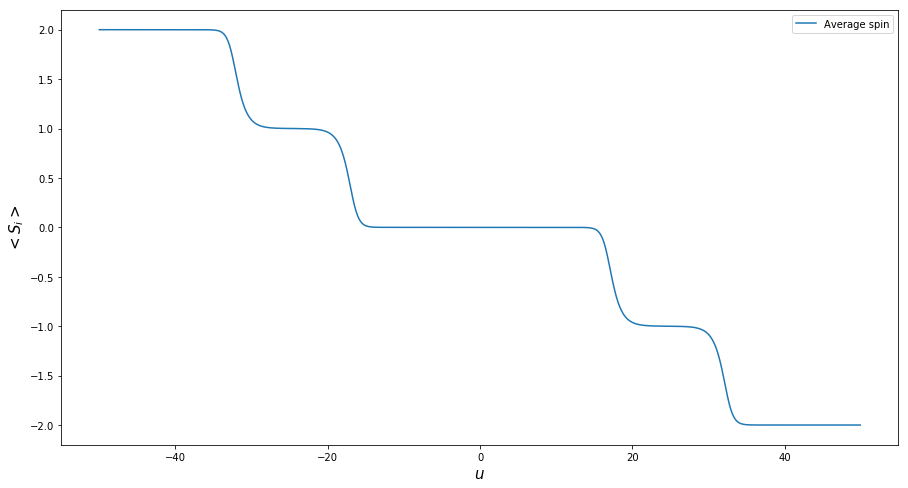

In [15]:
plotter_two(-50,0.1,1000,2,28,0.7,0.7)

## This notebook has shown an example of how the numerical computation was performed using Python.